In [ ]:
# !pip3 install pandas yfinance matplotlib prophet

In [41]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from prophet import Prophet


In [49]:
from datetime import datetime

nome_acao = 'PETR4.SA'
data_inicio = '2022-01-01'
data_fim = datetime.today().strftime('%Y-%m-%d')
data_corte_treino = datetime.today().strftime('%Y-%m-%d')
dias_previsao = 30
codigo_pais = 'BR'


df = yf.download(nome_acao, start=data_inicio, end=data_fim, progress=False).reset_index()

In [50]:
df_treino = df[df['Date'] < data_corte_treino]
df_teste = df[df['Date'] >= data_corte_treino]

In [51]:
# Pegando os dados de interesse e renomeando
df_prophet_treino = df_treino[['Date', 'Close']].rename(columns={'Date': 'ds', 'Close': 'y'})

In [52]:
# Criar e tereinar o modelo
modelo = Prophet(
                  weekly_seasonality=True,
                  yearly_seasonality=True,
                  daily_seasonality=True)

modelo.add_country_holidays(country_name=codigo_pais)
modelo.fit(df_prophet_treino)

DEBUG:cmdstanpy:input tempfile: /tmp/tmppk93gano/60_wtpf6.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmppk93gano/drlj4m6b.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=13398', 'data', 'file=/tmp/tmppk93gano/60_wtpf6.json', 'init=/tmp/tmppk93gano/drlj4m6b.json', 'output', 'file=/tmp/tmppk93gano/prophet_model6neqs4ek/prophet_model-20240329143650.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:36:50 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:36:51 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [53]:
# Prevendo os dados "futuros"
futuro = modelo.make_future_dataframe(periods=dias_previsao)
df_previsao = modelo.predict(futuro)
#df_previsao

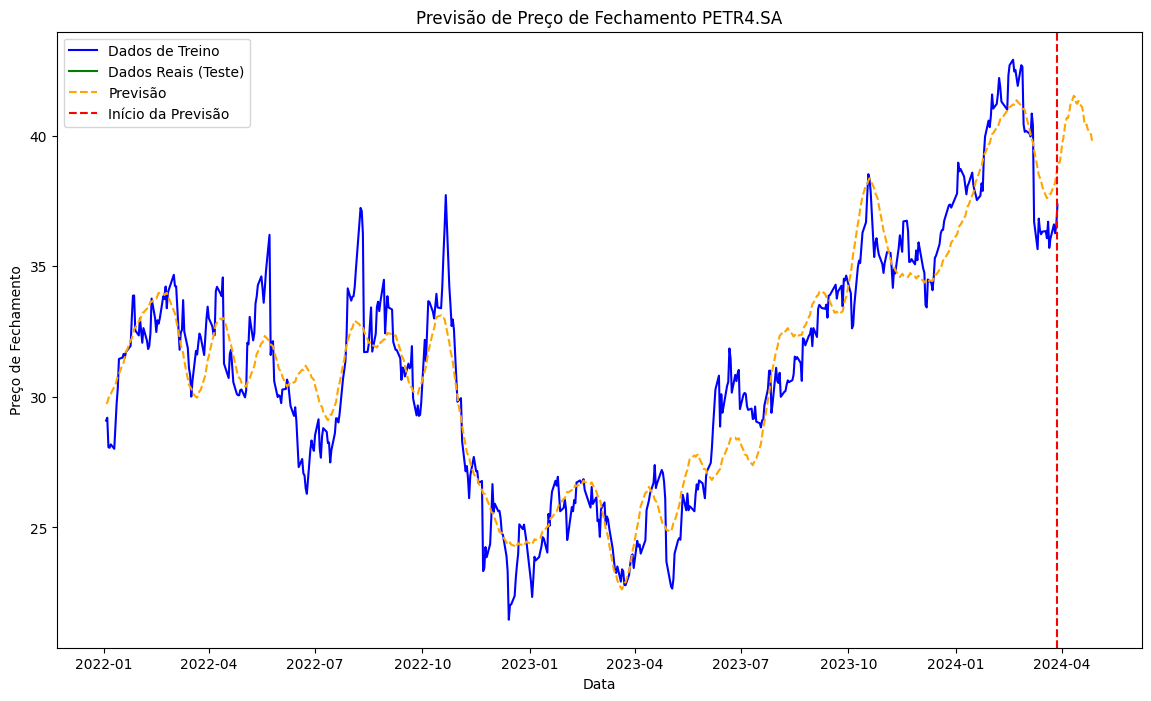

In [54]:
# Plotando os resultados
plt.figure(figsize=(14, 8))
plt.plot(df_treino['Date'], df_treino['Close'], label='Dados de Treino', color='blue')
plt.plot(df_teste['Date'], df_teste['Close'], label='Dados Reais (Teste)', color='green')
plt.plot(df_previsao['ds'], df_previsao['yhat'], label='Previsão', color='orange', linestyle='--')

plt.axvline(df_treino['Date'].max(), color='red', linestyle='--', label='Início da Previsão')
plt.xlabel('Data')
plt.ylabel('Preço de Fechamento')
plt.title(f'Previsão de Preço de Fechamento {nome_acao}')
plt.legend()
plt.show()